In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import scipy.stats as stats

In [2]:
with open('../../data/pract_dataset_lab3.pkl', 'rb') as f:
    df = pickle.load(f)

In [3]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

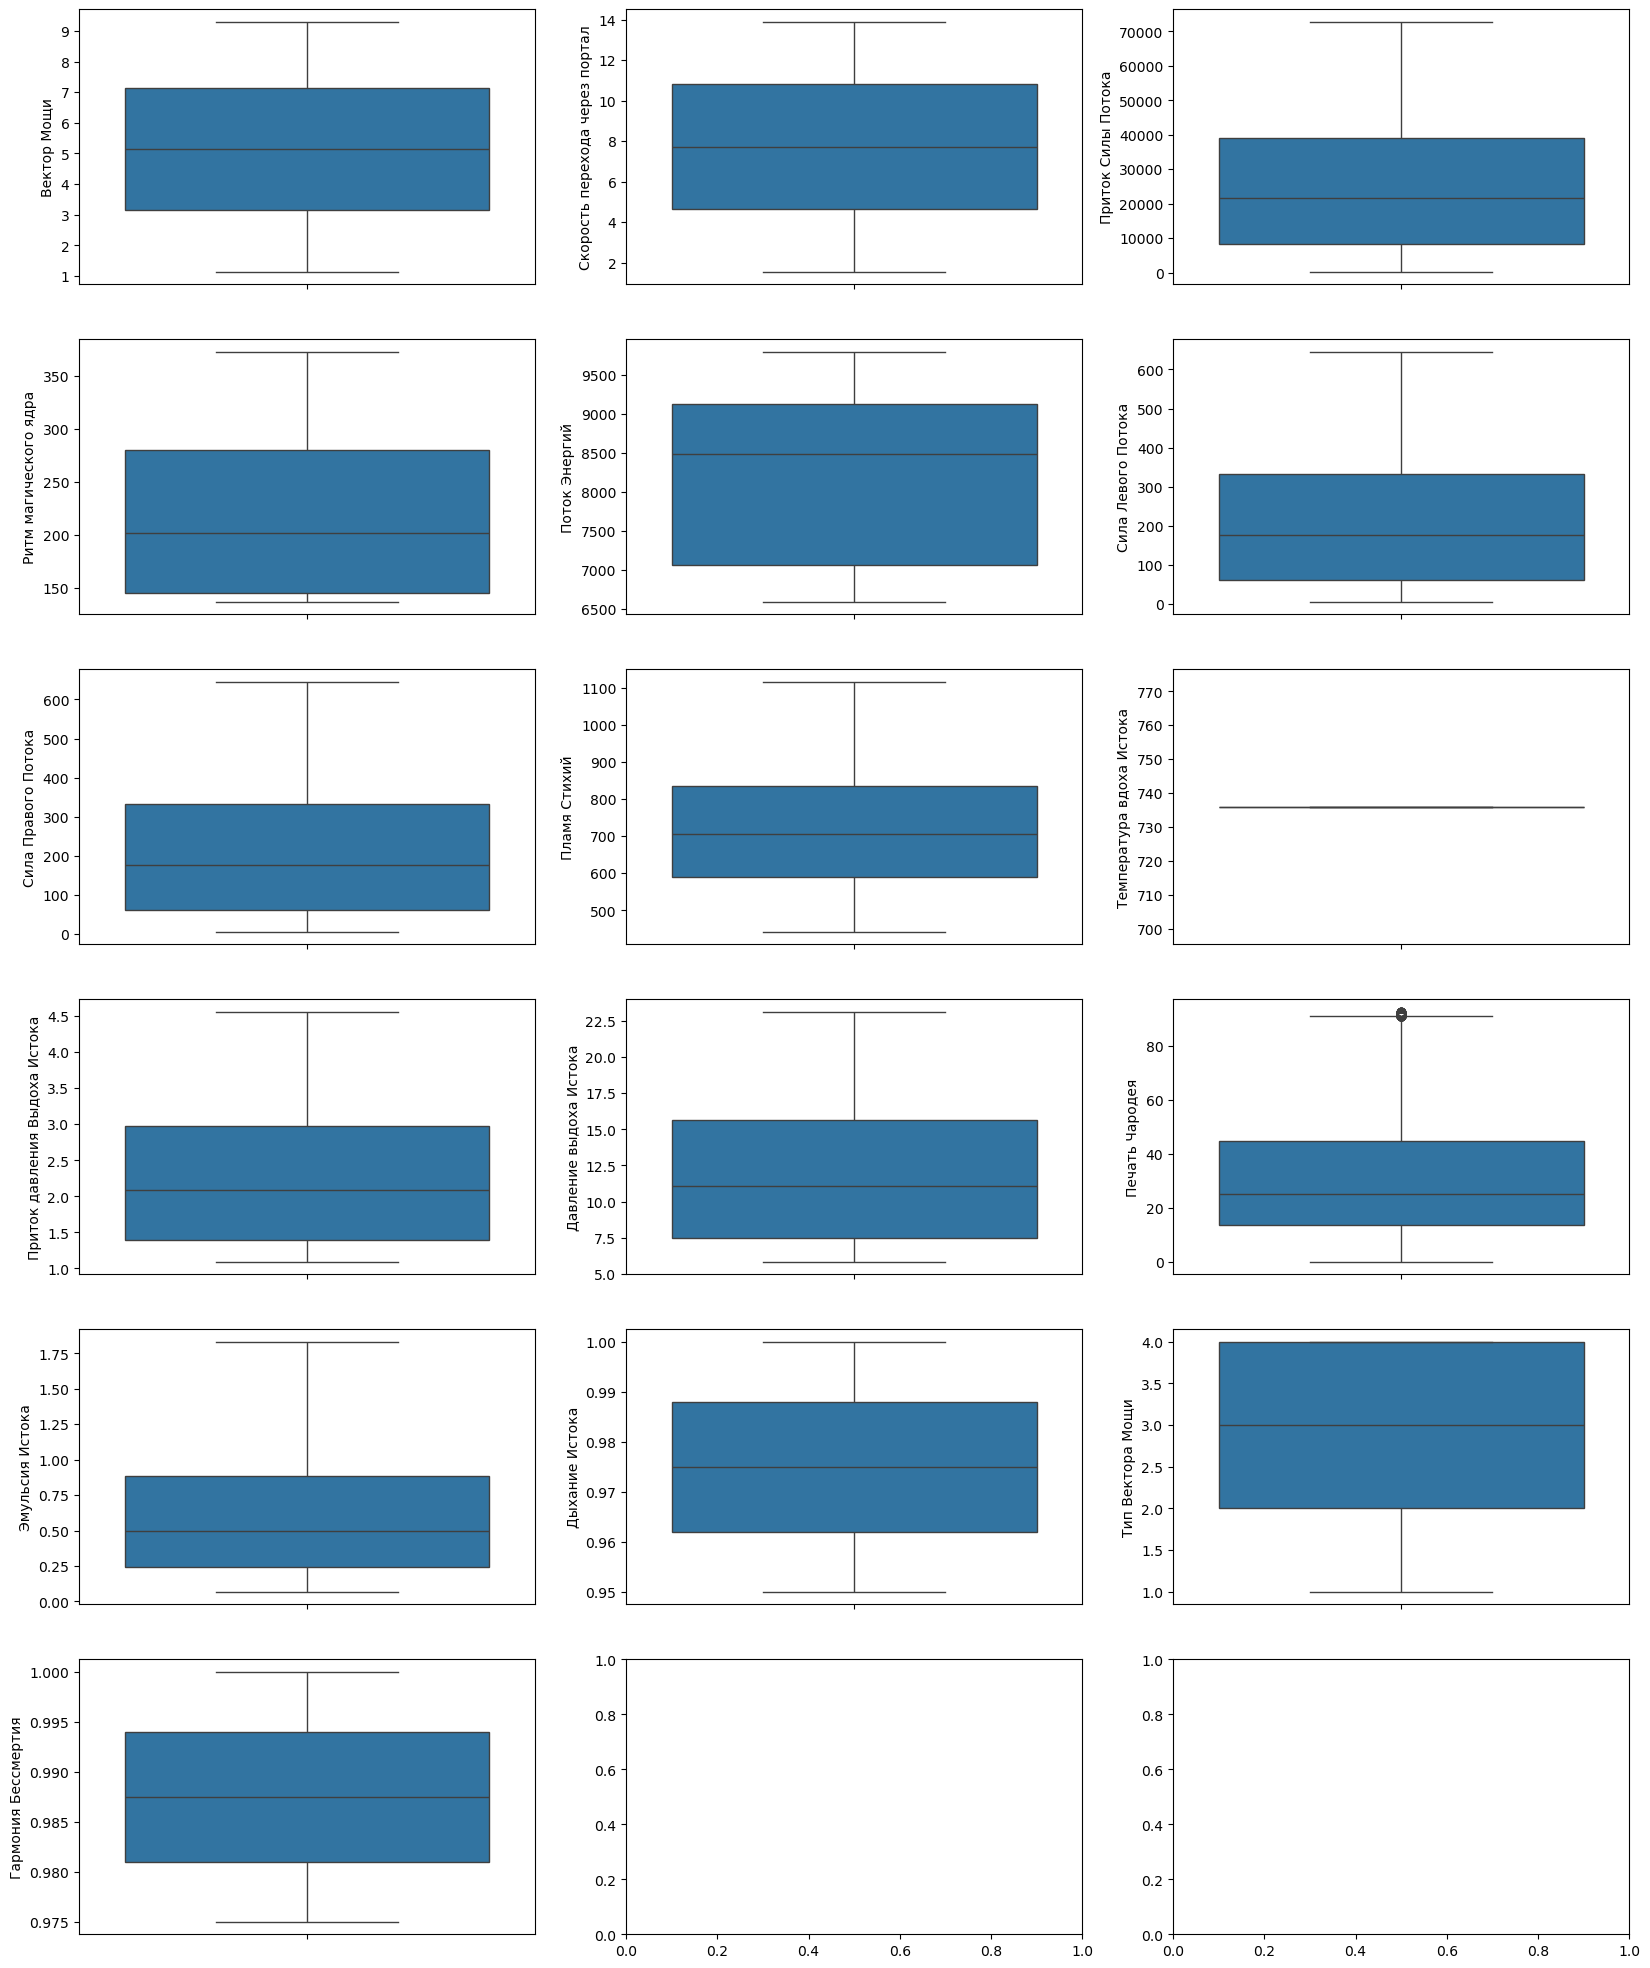

In [4]:
n_col = 3
n = len(df.columns)
n_row = int(np.ceil(n / n_col))

_, ax = plt.subplots(n_row, n_col, figsize=(20, 25))

columns = df.columns

for i in range(n_row):
    for j in range(n_col):
        k = i * n_col + j
        if k == n:
            break
        column = columns[k]
        x = df[column]
        sns.boxplot(x, ax=ax[i, j])

Видим выбросы в признаке "Печать чародея"

# IQR

In [5]:
q1, q3 = np.percentile(df_train['Печать Чародея'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [6]:
df_train_iqr_out = df_train[(df_train['Печать Чародея'] < lower_bound) | (df_train['Печать Чародея'] > upper_bound)]
df_train_iqr_out.index

Index([3761,  512,   80,  134, 2150, 3752, 3302,  944, 3059,  269,
       ...
       2114, 1250, 2159,  746, 1457, 1448, 3284, 1952, 2177, 3293],
      dtype='int64', length=125)

# r_z score

In [7]:
median = df_train['Печать Чародея'].median()
mad = (np.abs(df_train['Печать Чародея'] - median)).median()
r_z_score = 0.6745*(df_train['Печать Чародея'] - median) / mad

In [8]:
df_train_rzscore_out = df_train[np.abs(df_train['Печать Чародея']) > 3]

In [9]:
df_train_rzscore_out.index

Index([ 8352,  2542,  3562,  3371,  6000,  9300,  1677,  1135, 11696,  5346,
       ...
        1583,  6524, 10139,  3293,  1319,  7771,   148,  7253, 11136,  1919],
      dtype='int64', length=8734)

In [10]:
out_idx = set(df_train_iqr_out.index) & set(df_train_rzscore_out.index)

In [11]:
len(out_idx)

125

In [12]:
df_train_stat_proccessed = df_train.drop(index=out_idx)
df_train_stat_proccessed.head()

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура вдоха Истока,Приток давления Выдоха Истока,Давление выдоха Истока,Печать Чародея,Эмульсия Истока,Дыхание Истока,Тип Вектора Мощи,Гармония Бессмертия
8352,1.138,1.54332,4855.828,138.294898,6632.781,5.864,5.864,593.795,736.0,1.251,6.754,30.084,0.261,0.985,1.0,0.993
2542,5.140,7.71660,21637.112,201.517147,8505.087,175.319,175.319,704.763,736.0,2.075,10.963,24.906,0.493,0.960,3.0,0.997
3562,8.206,12.34656,50996.143,323.328422,9311.233,438.007,438.007,936.812,736.0,3.583,18.576,61.369,1.215,0.965,4.0,0.980
3371,6.175,9.25992,29791.710,241.632772,8823.437,246.257,246.257,781.806,736.0,2.504,13.245,34.669,0.686,0.964,3.0,0.985
6000,7.148,10.80324,38990.686,280.447568,9128.197,332.290,332.290,821.369,736.0,2.971,15.488,43.688,0.865,0.975,4.0,0.991


In [15]:
import pickle

with open(r"../../data/df_train_stat_proccessed.pkl", 'wb') as f:
    pickle.dump(df_train_stat_proccessed, f)

with open(r"../../data/df_test.pkl", 'wb') as f:
    pickle.dump(df_test, f)

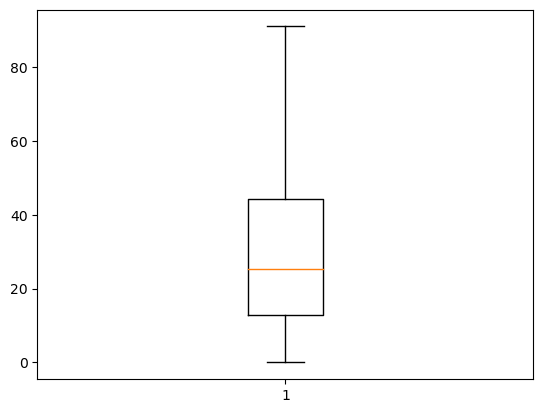

In [13]:
plt.boxplot(df_train_stat_proccessed['Печать Чародея'])
plt.show()

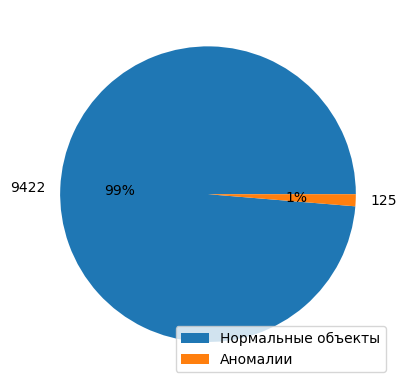

In [47]:
_, counts = np.unique(isf_anomaly.astype(bool), return_counts=True)

plt.pie([len(df_train) - len(out_idx), len(out_idx)], labels=[len(df_train) - len(out_idx), len(out_idx)], autopct='%1.0f%%');
plt.legend([
    'Нормальные объекты', 'Аномалии'
], loc='lower right');

In [14]:
X_train = df_train.drop(columns=['Гармония Бессмертия'])

# IsonlationForest

In [15]:
from umap import UMAP

In [16]:
umap = UMAP().fit(X_train)
X_2d = umap.transform(X_train)

C:\Users\Denis\miniconda3\envs\myenv\lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [17]:
from pyod.models.iforest import IForest

isf = IForest().fit(X_train)
isf_anomaly = isf.predict(X_train)

C:\Users\Denis\miniconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


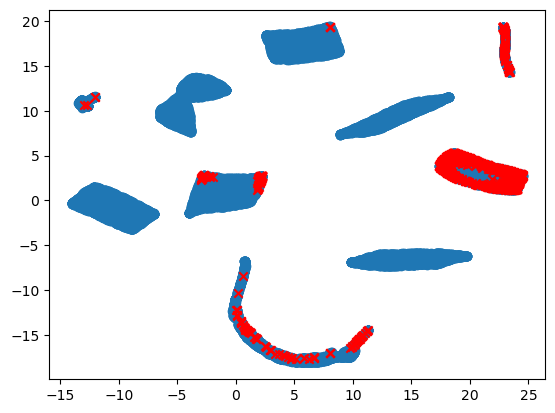

In [18]:
plt.scatter(X_2d[:, 0], X_2d[:, 1])
plt.scatter(X_2d[isf_anomaly.astype(bool), 0], X_2d[isf_anomaly.astype(bool), 1], c='red', marker='x')

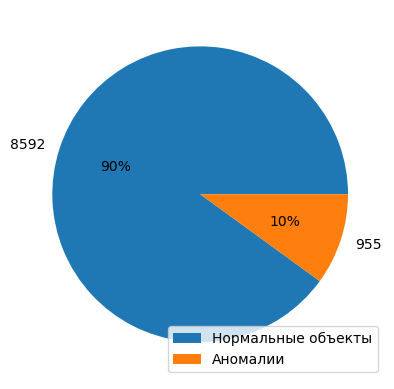

In [19]:
_, counts = np.unique(isf_anomaly.astype(bool), return_counts=True)

plt.pie(counts, labels=counts, autopct='%1.0f%%');
plt.legend([
    'Нормальные объекты', 'Аномалии'
], loc='lower right');

# OCSVM

In [20]:
from pyod.models.ocsvm import OCSVM

ocsvm = OCSVM().fit(X_train)
ocsvm_anomaly = ocsvm.predict(X_train)

C:\Users\Denis\miniconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but OneClassSVM was fitted without feature names
  warnings.warn(


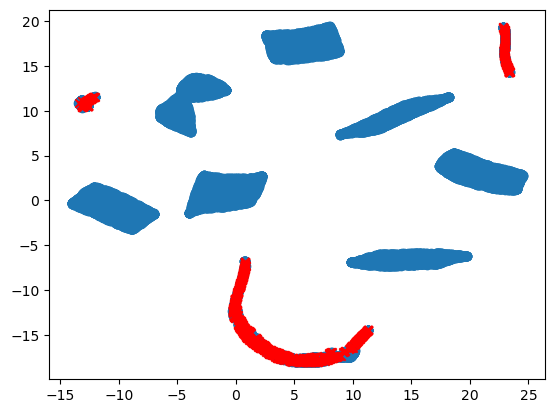

In [21]:
plt.scatter(X_2d[:, 0], X_2d[:, 1])
plt.scatter(X_2d[ocsvm_anomaly.astype(bool), 0], X_2d[ocsvm_anomaly.astype(bool), 1], c='red', marker='x')

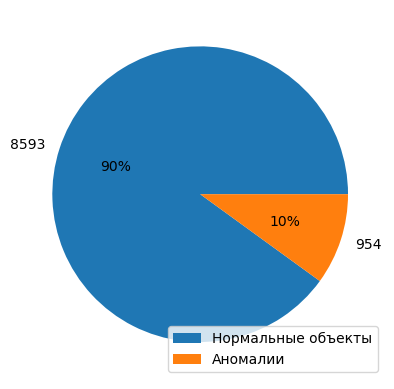

In [22]:
_, counts = np.unique(ocsvm_anomaly.astype(bool), return_counts=True)

plt.pie(counts, labels=counts, autopct='%1.0f%%');
plt.legend([
    'Нормальные объекты', 'Аномалии'
], loc='lower right');

# DBSCAN

In [23]:
from sklearn.cluster import DBSCAN

In [24]:
dbscan = DBSCAN(eps=10, min_samples=5).fit(X_train)
dbscan_labels = dbscan.labels_

anomaly_mask_dbscan = dbscan_labels == -1

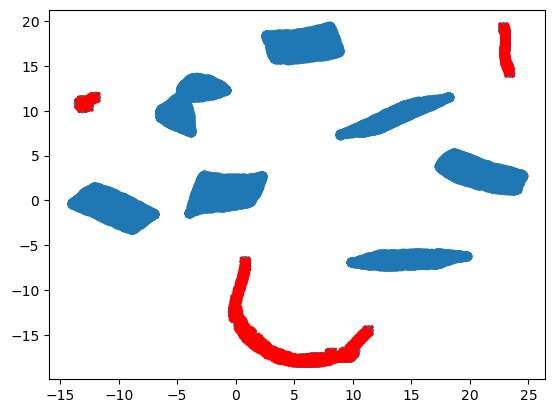

In [25]:
plt.scatter(X_2d[:, 0], X_2d[:, 1])
plt.scatter(X_2d[anomaly_mask_dbscan, 0], X_2d[anomaly_mask_dbscan, 1], c='red', marker='x')

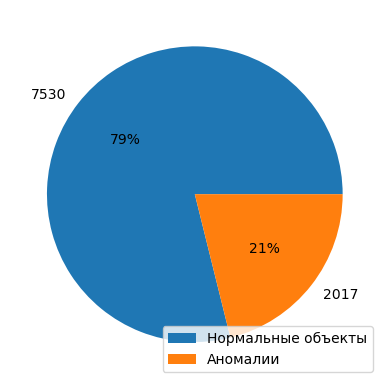

In [26]:
_, counts = np.unique(anomaly_mask_dbscan, return_counts=True)
plt.pie(counts, labels=counts, autopct='%1.0f%%')
plt.legend(['Нормальные объекты', 'Аномалии'], loc='lower right')
plt.show()

In [38]:
ml_anomalies = np.all(np.array([
    isf_anomaly,
    ocsvm_anomaly,
    anomaly_mask_dbscan
]), axis=0)
ml_anomalies

array([ True, False, False, ..., False, False, False])

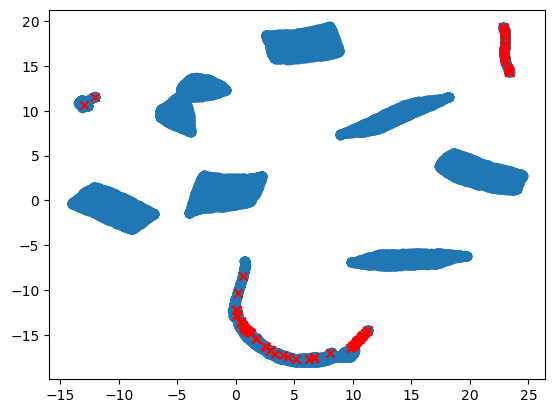

In [39]:
plt.scatter(X_2d[:, 0], X_2d[:, 1])
plt.scatter(X_2d[ml_anomalies, 0], X_2d[ml_anomalies, 1], c='red', marker='x')

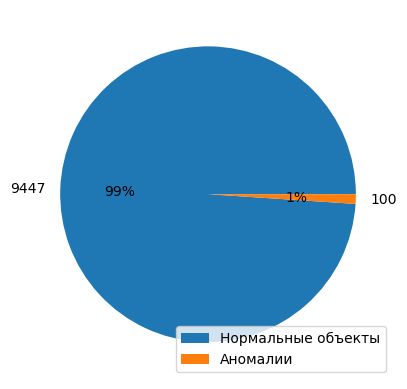

In [40]:
_, counts = np.unique(ml_anomaly, return_counts=True)
plt.pie(counts, labels=counts, autopct='%1.0f%%')
plt.legend(['Нормальные объекты', 'Аномалии'], loc='lower right')
plt.show()

In [42]:
anomaly_index = df_train.loc[ml_anomalies].index
anomaly_index

Index([ 8352,  4050,  1080,  5247,  6201,   918,  1602,  9072,  3807,  5724,
        1332,  4167,  5004,  6687,   162,   621,  3330,   459,  3951,  2124,
        4761,  1566,  7398,    90,   945,  3222,   873,  2511,  2997,  5490,
        3087,  2520,  1809,  4176,   630,   837,  1089,  2286,   207,   603,
         189,  1575,   171,  6678,  1647,  8118,   702,   657,  2988,   333,
        2268,  2754,   666,  3708,   144,   711,  4041,   612,  3240,     9,
        2502,  1404,  4878,  3213,  1179,   864,   936,  4518,  2133,  6543,
        6066, 10755,  2610,  7641,  3096,  9090,  2277,   855,   108,   891,
        4995,   126,  8595,  1314,  6921,  1548,  2844,  3798,  1413,   900,
        5013,   387,  5715,  1323,  6075,  6912,  5355,   909,  1818,  3942],
      dtype='int64')

In [43]:
df_train_ml_proccessed = df_train.drop(index=anomaly_index)

In [44]:
df_train_ml_proccessed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9447 entries, 2542 to 1919
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Вектор Мощи                     9447 non-null   float64
 1   Скорость перехода через портал  9447 non-null   float64
 2   Приток Силы Потока              9447 non-null   float64
 3   Ритм магического ядра           9447 non-null   float64
 4   Поток Энергий                   9447 non-null   float64
 5   Сила Левого Потока              9447 non-null   float64
 6   Сила Правого Потока             9447 non-null   float64
 7   Пламя Стихий                    9447 non-null   float64
 8   Температура вдоха Истока        9447 non-null   float64
 9   Приток давления Выдоха Истока   9447 non-null   float64
 10  Давление выдоха Истока          9447 non-null   float64
 11  Печать Чародея                  9447 non-null   float64
 12  Эмульсия Истока                 9447